# Algorithm 7 Data Combiner / Dimension Reducer

In [1]:
%matplotlib inline
import numpy as np
import os
import pandas as pd
import pickle as pk
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler #Can also try MinMaxScaler or MaxAbsScaler

SETUP

231 patches created with algorithm 7 loaded.
[4.14308904e+04 3.11121573e+04 1.67018926e+04 1.51858063e+04
 1.30903091e+04 1.25700828e+04 1.03162824e+04 8.49794107e+03
 7.13676299e+03 6.48749498e+03 5.72545777e+03 5.17931524e+03
 4.55916845e+03 4.38540602e+03 4.30212235e+03 4.15130211e+03
 3.15086950e+03 2.88614207e+03 2.50030587e+03 2.39475930e+03
 1.89607409e+03 1.69086026e+03 1.45305158e+03 1.35240959e+03
 1.05744805e+03 8.72551905e+02 8.21188488e+02 8.13650926e+02
 7.87729894e+02 7.76465744e+02 6.78595273e+02 6.10321301e+02
 5.79886175e+02 5.67628998e+02 5.28042956e+02 4.86584504e+02
 4.55636074e+02 4.37840029e+02 3.78760881e+02 3.44055448e+02
 3.32312443e+02 3.13381711e+02 3.00094955e+02 2.45241665e+02
 2.38263003e+02 2.25457116e+02 2.10785926e+02 1.93209800e+02
 1.75490695e+02 1.64217679e+02 1.58757446e+02 1.46404690e+02
 1.29329663e+02 1.20364311e+02 1.11989759e+02 1.05362692e+02
 9.36561514e+01 8.90274349e+01 8.59545471e+01 7.35369921e+01
 6.31637147e+01 6.07012130e+01 5.9677152

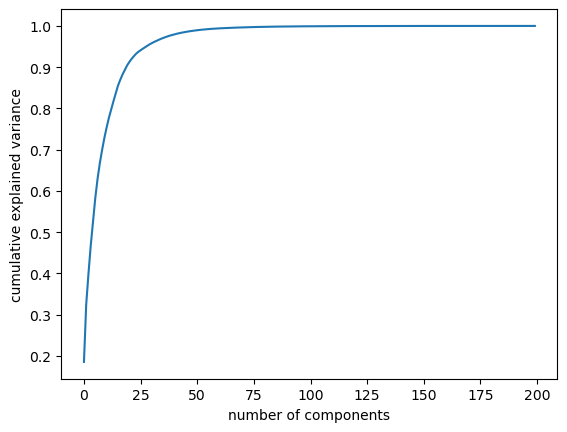

In [2]:
#open directory with the spectrograms and audio data.
used_raw_data = True

os.chdir('..')
os.chdir('./data/')

SampleFeatures = pd.read_csv('SampleSpectra7.csv', index_col = 0)

if used_raw_data:
    SampleWav = pd.read_csv('SampleWav7.csv', index_col = 0)
    SampleFeatures = pd.concat([SampleFeatures, SampleWav], axis = 1, join = 'inner')
    del SampleWav

print(len(SampleFeatures),'patches created with algorithm 6 loaded.')

# Have to rescale before using PCA
scaler = StandardScaler()
SampleFeatures = scaler.fit_transform(SampleFeatures)
# To do: extract vectors of means and stdevs to transform input for prediction later.
# Recall Z-score formula: (x-m)/s. That's exactly what this has done.
np.savetxt('mean7.csv',scaler.mean_, delimiter = ',')
np.savetxt('scale7.csv',scaler.scale_, delimiter = ',') #stdev

pca = PCA(n_components = 200) # Has to be <= min(# samples, # features)
pca.fit(SampleFeatures)
ReducedFeatures = pca.transform(SampleFeatures)
print(pca.explained_variance_)
print('reduced shape ', ReducedFeatures.shape)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

SAVING THIS PCA TO DISK

In [3]:
os.chdir('..')
os.chdir('./models/')

with open('pca7.pkl','wb') as export_file:
    pk.dump(pca, export_file)

# In training script and predictor program, use the following
# pca_reload = pk.load(open("pca.pkl",'rb'))
# result_new = pca_reload.transform(X)